#### Import Necessary Libraries

In [2]:
import pandas as pd

#### Task 1: Merging 12 months of sales data into a single file

In [3]:
import os

# Set up file path
file_path = "./Sales_Data/"

# List all the files in the file path using listdir function
file_list = os.listdir(file_path)

#Create empty dataframe and merge all sales data into the dataframe
df = pd.DataFrame()
for file in file_list:
    data = pd.read_csv(file_path + file)
    df = pd.concat([df, data], axis = 0)

#Count the number of rows for each columns in the dataframe
df.count(axis=0)

#Convert to a single merged file
df.to_csv("Merged_Sales_Data.csv", index=False)

#### Read in updated dataframe and clean up the data

In [4]:
all_data = pd.read_csv("Merged_Sales_Data.csv")

all_data = all_data.dropna(how='all')

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Question 1: What was best month for sales? How much was earned that month ?


#### Task 2: Add additional month column

In [5]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

all_data['Month'] = all_data["Order Date"].str[0:2]

all_data['Month'] = all_data['Month'].astype('int32')

#### Task 3: Add additional sales column (Quantity * Price)

In [6]:
#Convert the Quantity Ordered into int data typr
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
#Convert the Price Each into float data type
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data["Sales"] = all_data["Quantity Ordered"] * all_data ["Price Each"]

#### Task 4: Groupby month

In [30]:
result = all_data.groupby('Month').sum()

#### Task 5: Print the result represent the month with the highest sales

In [33]:
max_sales = result['Sales'].max()
max_month = result['Sales'].idxmax()

print(f"The maximum sales is {max_sales} in {max_month}.")

The maximum sales is 4613443.34 in 12.


#### Task 6: Plot the graph represent 12 months sales

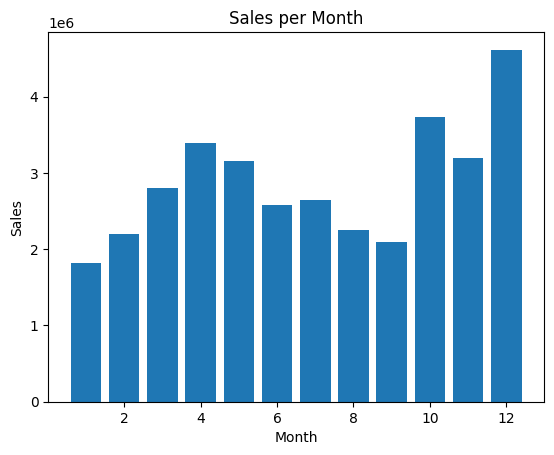

In [38]:
import matplotlib.pyplot as plt

result = all_data.groupby('Month').sum()
months = result.index
sales = result['Sales']

plt.bar(months, sales)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per Month')

plt.show()

In [36]:
result["Sales"]

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64